# MNIST Classification
In this exercise we will explore the performance of several classification techniques on classifying handwritten digits. The canonical dataset used is the MNIST dataset (https://en.wikipedia.org/wiki/MNIST_database). We will evaluate classifier performance through train/validation/test sets provided to you. 

This exercise will use TensorFlow (https://en.wikipedia.org/wiki/TensorFlow). <b>Ignore all warnings produced by the tensorflow library (or others that you are required to use in this project, e.g. scikit-learn).</b>

In [3]:
# imports
from utils import get_data_extract
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import time
from sklearn.metrics import accuracy_score

# For reproducibility 
tf.random.set_seed(0)
np.random.seed(0)

Run the following line to retrieve the data and generate the training, validation, and test sets using the function <b>get_data_extract()</b> provided in <b>utils.py</b>. <br>
<b>We want you to use the training, validation and test sets provided by this function, exclusively.</b>

In [4]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = get_data_extract()

# 0. Understanding the data

The resolution of the images are all $28\times 28$. The corresponding feature vector of an image is a $28^2=784$ length 1D array representing the row-major flattened version of the image (i.e. the rows are concatenated top-down). All values in the array are in the range $[0,1]$ representing the grayscale value at that point. Note to get the pixel value, you would have to multiply these values by $255$.  

a) What are the dimensions of $X_{train}, X_{val}, X_{test}$?

In [6]:
# (1 pt) Calculate dimensions here
print('X_train dim: '+str(X_train.shape))
print('X_val dim: '+str(X_val.shape))
print('X_test dim: '+str(X_test.shape))

X_train dim: (16500, 784)
X_val dim: (1500, 784)
X_test dim: (3000, 784)


b) Display the first two images of $X_{train}$. (You may find the <b>np.reshape()</b> and <b>plt.imshow()</b> methods useful.)

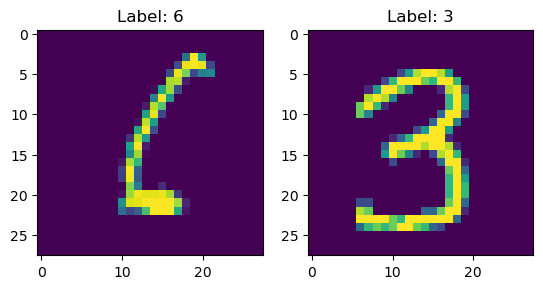

In [19]:
# (1 pt) Display first two training images here
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X_train[0].reshape(28,28))
ax[0].set_title(f"Label: {Y_train[0]}")
ax[1].imshow(X_train[1].reshape(28,28))
ax[1].set_title(f"Label: {Y_train[1]}")
plt.show()

c) Print out the first two labels in $Y_{train}$. 

In [21]:
# (1 pt) Print first two training labels here
print(f"Label 0: {Y_train[0]}")
print(f"Label 1: {Y_train[1]}")

Label 0: 6
Label 1: 3


We will now use the MNIST data extracts above to compare various classification algorithms. <b>ONLY use the data extracts provided above. </b> We are primarily interested in two metrics: 
1. the test set accuracy (0.0 being all incorrect and 1.0 being all correct)
2. time it takes to train the model and produce classifications for the <b>test set</b> <br>

$X_{train}, Y_{train}$ will be used for training while $X_{test}, Y_{test}$ will be used for evaluating performance. Some models will use $X_{val}, Y_{val}$ for parameter tuning. 

# 1. LDA


a) Use scikit-learn's LDA algorithm <b>LinearDiscriminantAnalysis()</b> to train an LDA-model. Only use the $X_{train}, Y_{train}$ data to fit the model. Use <b>time.time()</b> to note the time (in seconds) it takes to train the model and print it. 

In [23]:
# (4 pts) Train LDA and report time

# create an instance of the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# fit the model to the training data
start_time = time.time()
lda.fit(X_train, Y_train)
end_time = time.time()

# print the time it took to fit the model
print(f"Time to train LDA model: {end_time - start_time} seconds")

Time to train LDA model: 4.23463249206543 seconds


b) Use the <b>score()</b> function provided by LinearDiscriminantAnalysis() on the trained model to produce the accuracy on the test set $X_{test}, Y_{test}$ Also print the time it takes to produce these predictions. Clearly format your answers.

In [24]:
# (4 pts) Test LDA on X_test, Y_test and report accuracy, time
# use the trained model to predict on the test set
start_time = time.time()
accuracy = lda.score(X_test, Y_test)
end_time = time.time()

# print the accuracy and time to predict
print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Time to make predictions on test set: {end_time - start_time} seconds")

Accuracy on test set: 0.8680
Time to make predictions on test set: 0.11002707481384277 seconds


# 2. QDA

Repeat the exercise above for sklearn's QDA algorithm <b>QuadraticDiscriminantAnalysis()</b>. Produce the training time, test set prediction accuracy score and time taken to produce predictions. Format your answers.

In [26]:
# (4 pts) Train QDA and report time
# (4 pts) Test QDA and report accuracy, time
# create an instance of the QDA model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

# fit the model to the training data
start_time = time.time()
qda.fit(X_train, Y_train)
end_time = time.time()

# print the time it took to fit the model
print(f"Time to train QDA model: {end_time - start_time} seconds")

# use the trained model to predict on the test set
start_time = time.time()
accuracy = qda.score(X_test, Y_test)
end_time = time.time()

# print the accuracy and time to predict
print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Time to make predictions on test set: {end_time - start_time} seconds")

C:\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Time to train QDA model: 13.236860513687134 seconds
Accuracy on test set: 0.5913
Time to make predictions on test set: 1.292567253112793 seconds


# 3. Logistic Regression

Repeat the exercise above for sklearn's <b>LogisticsRegression()</b> algorithm. You might find the following arguments helpful when initializing the model: <b>penalty='l1', C=1.0, tol=0.01, solver='liblinear'</b>. These parameters will help speed up the algorithm significantly. Produce the training time, test set prediction accuracy score and time taken to produce predictions. Format your answers.

In [27]:
# (4 pts) Train Logistic Regression and report time
# (4 pts) Test Logistic Regression and report accuracy, time
from sklearn.linear_model import LogisticRegression

# create an instance of the logistic regression model
logreg = LogisticRegression(penalty='l1', C=1.0, tol=0.01, solver='liblinear')

# fit the model to the training data
start_time = time.time()
logreg.fit(X_train, Y_train)
end_time = time.time()

# print the time it took to fit the model
print(f"Time to train logistic regression model: {end_time - start_time:.4f} seconds")

# use the trained model to predict on the test set
start_time = time.time()
accuracy = logreg.score(X_test, Y_test)
end_time = time.time()

# print the accuracy and time to predict
print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Time to make predictions on test set: {end_time - start_time:.4f} seconds")


Time to train logistic regression model: 4.6404 seconds
Accuracy on test set: 0.9133
Time to make predictions on test set: 0.0135 seconds


<b>****** The folowing models take a long time to run so we suggest reading all parts of the exercise first before implementing code. *****</b>

# 4. k-Nearest Neighbors

a) Repeat the classification exercises above for sklearn's kNN algorithm <b>KNeighborsClassifier()</b> using <b>k=1</b>. You might find the following arguments helpful when initializing the model: <b>algorithm='kd_tree', metric='minkowski', p=2</b>. These parameters will help speed up the algorithm significantly. However, the predictions will still be very slow. Produce the training time, test set prediction accuracy score and time taken to produce predictions. Format your answers.

In [28]:
# (4 pts) Train kNN for k=1 and report time
# (4 pts) Test kNN and report accuracy, time
from sklearn.neighbors import KNeighborsClassifier

# create an instance of the kNN model
knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='minkowski', p=2)

# fit the model to the training data
start_time = time.time()
knn.fit(X_train, Y_train)
end_time = time.time()

# print the time it took to fit the model
print(f"Time to train kNN model: {end_time - start_time:.4f} seconds")

# use the trained model to predict on the test set
start_time = time.time()
accuracy = knn.score(X_test, Y_test)
end_time = time.time()

# print the accuracy and time to predict
print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Time to make predictions on test set: {end_time - start_time:.4f} seconds")


Time to train kNN model: 15.9941 seconds


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy on test set: 0.9547
Time to make predictions on test set: 206.7722 seconds


b) For the kNN model trained above, what is the prediction accuracy on the <b>training set</b> $X_{train}, Y_{train}$ (this will take a while to compute)? Compare this to the the prediction accuracy on the training set for the <b>LogisticRegression model</b>? 

In [29]:
# (2 pts) Report kNN training accuracy
# (2 pts) Report Logistic Regression training accuracy 
# compute the accuracy on the training set
accuracy_train = knn.score(X_train, Y_train)
print(f"Accuracy on training set: {accuracy_train:.4f}")

C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy on training set: 1.0000


c) (3 pts) Does anything surprise you about the Training set accuracies above? Why or why not?

Not surprising. A points nearest neighbor is itself

d) (3 pts) Can you think why there is such a large difference between the kNN algorithms's training and prediction times?

During prediction, each test point has to be compared to every training example while training uses a tree algorithm to efficiently compute the distances between each point

e) For now, we have only tried <b>k=1</b> (choose the closet neighbor) according to the Euclidean distance metric <b>p=2</b>. Repeat the exercise above for the following combinations of parameters: <b> k $\in$ {1, 3}, p $\in$ {2, 3} </b>. Note that p=2 is the 2-norm (Euclidean distance) and p=3 is the 3-norm. Train each of the models on the training set and evaluate the accuracy on the <b>validation set</b> $X_{val}, Y_{val}$. <b>NOTE: this might take a while!</b> Report the validation set accuracy for each model. Format your answers.

<b>Note:</b> We recommend following the code skeleton below.

In [30]:
# Train kNN for all combinations of parameters above and report validation accuracy for each
def runKNN(X_train, Y_train, X_val, Y_val, k, p):
    start_time = time.time()
    
    knn = KNeighborsClassifier(n_neighbors=k, p=p)
    knn.fit(X_train, Y_train)
    
    train_time = time.time() - start_time
    
    y_pred = knn.predict(X_val)
    val_score = accuracy_score(Y_val, y_pred)
    
    return knn, val_score, train_time

best_score = 0.0
best_k, best_p, best_knn = None, None, None
best_train_time = np.inf

for k in [1, 3]:
    for p in [2, 3]:
        knn_model, val_score, train_time = runKNN(X_train, Y_train, X_val, Y_val, k, p)
        
        if val_score > best_score:
            best_score = val_score
            best_k = k
            best_p = p
            best_knn = knn_model
            
        print(f"Validation accuracy for k={k}, p={p}: {val_score:.4f}, Training time: {train_time:.4f} seconds")
        
print(f"\nBest validation accuracy: {best_score:.4f} with k={best_k} and p={best_p}")

C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Validation accuracy for k=1, p=2: 0.9607, Training time: 0.5295 seconds


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Validation accuracy for k=1, p=3: 0.9633, Training time: 0.0379 seconds


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Validation accuracy for k=3, p=2: 0.9733, Training time: 0.0299 seconds
Validation accuracy for k=3, p=3: 0.9747, Training time: 0.0300 seconds

Best validation accuracy: 0.9747 with k=3 and p=3


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


f) (1 pt) Based on the scores on the validation set, which parameters give the best model? Report the time taken to train the best model.

Best validation accuracy: 0.9747 with k=3 and p=3

g) Using the best model, evaluate performance on the <b>test set</b>. Produce the prediction accuracy score and time taken to produce predictions. Please format your answers.

In [31]:
# (4 pts) Test best kNN and report accuracy, time
start_time = time.time()

y_pred = best_knn.predict(X_test)
test_score = accuracy_score(Y_test, y_pred)

test_time = time.time() - start_time

print(f"Test accuracy score for the best model (k={best_k}, p={best_p}): {test_score:.4f}")
print(f"Time taken to produce predictions on the test set: {test_time:.4f} seconds")



C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test accuracy score for the best model (k=3, p=3): 0.9593
Time taken to produce predictions on the test set: 1541.1423 seconds


# 6. Simple Neural Network

We will now complete the tasks above using a simple Neural Network model.
This portal comes with a tensorflow installation (see the imports at the very top of this file).
Your task is the following:
1. Adapt the tensorflow tutorial here (https://www.tensorflow.org/tutorials/quickstart/beginner) to train a simple Neural Network model
2. You are required to use <b>ONLY</b> the $X_{train}, Y_{train}, X_{val}, Y_{val}, X_{test}, Y_{test}$ subsets provided earlier in this assignment. <b>DO NOT use any other subsets of the mnist dataset: you will have to adapt the tutorial to use the data provided in this assignment.</b>
3. You will need to write a custom one-hot encoder for the labels
   Hint: you might find the following libraries useful:
		from keras.utils import to_categorical
4. Train using $X_{train}, Y_{train}$.
5. Finally, produce the following: Time taken to train the model; Time taken to produce Test set predictions; Test set accuracy

<b>Note:</b> We recommend following the code skeleton below.

In [ ]:
# Implement simpleNN
# Train simpleNN and report time
# Test simpleNN and report accuracy, time
from keras.utils import to_categorical
def simple_nn(X, Y, X_val, Y_val, X_test, Y_test):
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='relu'),  # add a hidden layer with 128 units and ReLU activation
        tf.keras.layers.Dense(256, activation='relu'),  # add a hidden layer with 128 units and ReLU activation
        tf.keras.layers.Dense(10, activation='softmax')  # add an output layer with 10 units 

    ])
    # One-hot encode the labels
    Y = to_categorical(Y)
    Y_val = to_categorical(Y_val)
    Y_test = to_categorical(Y_test)
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model and time it
    start_time = time.time()
    process = model.fit(X, Y, epochs=20, validation_data=(X_val, Y_val))
    train_time = time.time() - start_time
    
    # Evaluate the model on the test set and time it
    start_time = time.time()
    test_loss, test_acc = model.evaluate(X_test, Y_test)
    test_time = time.time() - start_time
    
    print(f"Test accuracy score for simple neural network: {test_acc:.4f}")
    print(f"Time taken to train the model: {train_time:.4f} seconds")
    print(f"Time taken to produce test set predictions: {test_time:.4f} seconds")
    
    return process

simple_process = simple_nn(X_train, Y_train, X_val, Y_val, X_test, Y_test)

Epoch 1/20
516/516 [==============================] - 4s 6ms/step - loss: 0.3186 - accuracy: 0.9048 - val_loss: 0.1277 - val_accuracy: 0.9640
Epoch 2/20
516/516 [==============================] - 3s 6ms/step - loss: 0.1317 - accuracy: 0.9608 - val_loss: 0.1120 - val_accuracy: 0.9640
Epoch 3/20
516/516 [==============================] - 3s 6ms/step - loss: 0.0817 - accuracy: 0.9739 - val_loss: 0.1130 - val_accuracy: 0.9613
Epoch 4/20
516/516 [==============================] - 3s 5ms/step - loss: 0.0542 - accuracy: 0.9824 - val_loss: 0.1053 - val_accuracy: 0.9647
Epoch 5/20
516/516 [==============================] - 3s 6ms/step - loss: 0.0417 - accuracy: 0.9864 - val_loss: 0.0855 - val_accuracy: 0.9740
Epoch 6/20
516/516 [==============================] - 3s 6ms/step - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.1189 - val_accuracy: 0.9653
Epoch 7/20
516/516 [==============================] - 3s 6ms/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.0730 - val_accuracy: 0.9760
Epoch 

(2 pts) Plot the training and validation accuracy curves in the same plot.

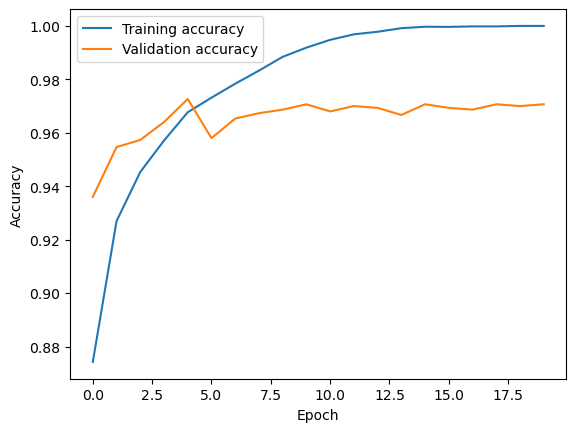

In [67]:
# hint: use simple_process
# Extract training and validation accuracy from simple_process.history
train_acc = simple_process.history['accuracy']
val_acc = simple_process.history['val_accuracy']

# Plot training and validation accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 7. Convolutional Neural Network

We will now complete the tasks above using a more complicated model: Convolutional Neural Network.

Your task is the following:
1. Adapt the CNN tensorflow tutorial here (https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/) to train a Convolutional Neural Network model
2. You are required to use <b>ONLY</b> the $X_{train}, Y_{train}, X_{val}, Y_{val}, X_{test}, Y_{test}$ subsets provided earlier in this assignment. <b>DO NOT use any other subsets of the mnist dataset: you will have to adapt the tutorial to use the data provided in this assignment.</b>
3. Use the same one-hot encoder as the previous part
4. Train using $X_{train}, Y_{train}$.
5. Finally, produce the following:
	Time taken to train the model; Time taken to produce Test set predictions; Test set accuracy

<b>Note:</b> We recommend following the code skeleton below.

In [71]:
# Implement CNN
# Train CNN and report time
# Test CNN and report accuracy, time

from keras.utils import to_categorical
from keras import layers
from keras.optimizers import SGD

def conv_nn(X_train, Y_train, X_test, Y_test):
    # (1 pt) reshape dataset to have a single channel (see tutorial)
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

    # (1 pt) one-hot encode the labels
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)

    model = tf.keras.models.Sequential([
        # (8 pts) your model here
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # (2 pts) compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    process = model.fit(
        # (4 pts) train model for 20 epochs and time it
        X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test), verbose=1
    )
    
    # (4 pts) evaluate model and time it
    _, acc = model.evaluate(X_test, Y_test, verbose=0)
    return acc, process.history['accuracy'], process.history['val_accuracy'], process

test_accuracy, train_acc, val_acc, conv_process = conv_nn(X_train, Y_train, X_test, Y_test)
print("Test Accuracy: %.3f" % (test_accuracy * 100.0))

Epoch 1/20
516/516 [==============================] - 9s 16ms/step - loss: 0.3324 - accuracy: 0.8985 - val_loss: 0.1593 - val_accuracy: 0.9523
Epoch 2/20
516/516 [==============================] - 7s 14ms/step - loss: 0.1225 - accuracy: 0.9639 - val_loss: 0.1003 - val_accuracy: 0.9680
Epoch 3/20
516/516 [==============================] - 9s 17ms/step - loss: 0.0757 - accuracy: 0.9774 - val_loss: 0.0906 - val_accuracy: 0.9727
Epoch 4/20
516/516 [==============================] - 8s 15ms/step - loss: 0.0498 - accuracy: 0.9857 - val_loss: 0.0958 - val_accuracy: 0.9703
Epoch 5/20
516/516 [==============================] - 9s 17ms/step - loss: 0.0327 - accuracy: 0.9916 - val_loss: 0.0671 - val_accuracy: 0.9793
Epoch 6/20
516/516 [==============================] - 8s 16ms/step - loss: 0.0235 - accuracy: 0.9933 - val_loss: 0.0754 - val_accuracy: 0.9770
Epoch 7/20
516/516 [==============================] - 9s 17ms/step - loss: 0.0132 - accuracy: 0.9973 - val_loss: 0.0753 - val_accuracy: 0.9773

(2 pts) Plot the training and validation accuracy curves in the same plot.

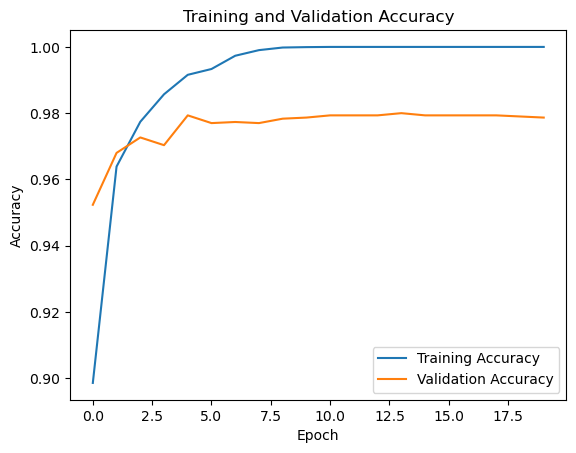

In [72]:
# hint: use conv_process
plt.plot(conv_process.history['accuracy'], label='Training Accuracy')
plt.plot(conv_process.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(3 pts) What do you observe in the plots showing training v.s. validation accuracies? Why?

In both the plots, we see that training accuracy starts high and gradually improves over time as the model becomes better at fitting the training data. On the other hand, the validation accuracy initially increases with the training accuracy but then stops improving and plateaus, indicating that the model is starting to overfit the training data and is not generalizing well to the validation data.

In the simple Neural Network model, the validation accuracy plateaus at around 0.97, while the training accuracy approaches 1. This suggests that the model is overfitting the training data and needs to be regularized.

In the Convolutional Neural Network model, the validation accuracy plateaus at around 0.98, while the training accuracy approaches 1.0. This indicates that the CNN model is a better fit for the data and can generalize well to unseen data.

(6 pts) Comment on the features of the various algorithms you have used in this assignment and the tradeoffs between computational efficiency and accuracy.

KNN is a simple non-parametric algorithm that uses all the training data to calculate distances between test instances for prediction. Although it has a negligible training time, KNN can be computationally expensive during testing, especially with large training sets. KNN performs well in low-dimensional spaces but struggles with high-dimensional data.

NN and CNN are deep learning algorithms that can learn complex features from input data. NN is computationally expensive to train, but it can learn complex non-linear relationships between input and output. CNN is designed for image data and uses convolutional layers to extract features and pooling layers to downsample them. CNN is generally faster during testing than NN and can learn better features from image data, making it the best choice for image classification tasks.

The choice between computational efficiency and accuracy depends on the specific application. KNN may be a good choice for low-computing resource applications that can tolerate lower accuracy, while NN and CNN may be better suited for high-computing resource applications that require high accuracy. CNN is better for image data, while NN may be better suited for other types of data such as text or speech.